In [2]:
import sys

import matplotlib.pyplot as plt
import scipy.stats
import math
import numpy as np
from textwrap import wrap

In [3]:
#
def plot_hist(input_files, outfile, num_bins, title_prefix, save_png=False):

    validstring = ""

    #read input file containing sample values separated by " ", with trailing whitespace
    samples = []
    for input_file in input_files:
        with open(input_file, 'r') as f:
            x = [l.split(" ") for l in f]
            y = list(filter(lambda z: len(z) > 0, x[0]))

            # old format only stores pvalues in file, new format stores number of p-values in first number
            if not ("." in y[0]):
              y.pop(0)
              validstring = " valid"
            samples.extend([float(a) for a in y])


    # logging
#    for s in samples:
#      if s > 1.0:
#          print(s)



    # compute sample mean and sample variance
    N = (float)(len(samples))
    sample_sum = sum(samples)
    sample_mean = sample_sum / N
    sample_var_2 = (1/(N-1)) * (sum(map(lambda x: x*x, samples)) - (1/N) * (sample_sum * sample_sum))
    sample_var = math.sqrt(sample_var_2)
    print("sample mean: " + str(sample_mean))
    print("sample var: " + str(sample_var_2))

    # generate lists for plotting sample mean and sample variance
    mean_x = [sample_mean]
    mean_y = [0]
    var_x = [sample_mean - sample_var, sample_mean + sample_var]
    var_y = [0,0]

    # plot mean as red dot
    plt.plot(mean_x, mean_y, "ro")

    # plot histogram
    plottitle = str(len(samples)) + validstring + " Welch samples, " + str(num_bins) + " bins"
    n, bins, patches = plt.hist(samples, 
                                num_bins,
                                density=True,
                                facecolor='blue', 
                                alpha=0.3)



    plt.grid(which='major', ls='solid', color='lightgray')
    plt.gca().set_axisbelow(True)

    
    t = title_prefix + plottitle
    plt.title("\n".join(wrap(t)))
    
    plt.savefig(outfile +".pdf")
    if save_png:
        plt.savefig(outfile+".png")
   # plt.show()



sample mean: 0.8139855320261444
sample var: 0.04139437046961706


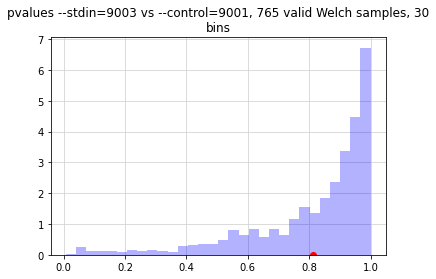

In [6]:
# for p-values 30 seems a nice number of bins, as there are ~1700 values
# (576*3 with our test scenes, depending on the image resolution), at least when every block makes sense
# if some image regions are pure black anyway, their p-values should be discarded before being passed to this script!
num_bins = 30

if len(sys.argv) < 4:
  print("wrong args. supposed to be pvalhist.py inputfile.txt render1 render2")
  quit()

# some file parsing
def remove_path_and_ending(filename):
  return filename.split("/")[-1].split(".")[0]

input_file = "C:/dev/biasdetector/build/pvalues.txt"
r1 = sys.argv[2].replace("_"," ")
r2 = sys.argv[3].replace("_"," ")

r1 = remove_path_and_ending(r1)
r2 = remove_path_and_ending(r2)

save_png = False
if len(sys.argv) > 4:
  if (sys.argv[4] == "--png"):
    save_png = True
    print("Also saving png file.")

title_prefix = "pvalues " + r1 + " vs " + r2 + ", "
outfile = input_file.replace(".txt","")

# plot histogram
plot_hist([input_file], outfile, num_bins, title_prefix, save_png)
